In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix

15 100
(1, 2) (2, 100)
[[0.83867057 0.54463904]]
[[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5
  6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1
  2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3
  3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7
  7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9]]
[[ 0.          0.83867057  1.67734114  2.5160117   3.35468227  4.19335284
   5.03202341  5.87069398  6.70936454  7.54803511  0.54463904  1.3833096
   2.22198017  3.06065074  3.89932131  4.73799187  5.57666244  6.41533301
   7.25400358  8.09267415  1.08927807  1.92794864  2.76661921  3.60528977
   4.44396034  5.28263091  6.12130148  6.95997205  7.79864261  8.63731318
   1.63391711  2.47258767  3.31125824  4.14992881  4.98859938  5.82726994
   6.66594051  7.50461108  8.34328165  9.18195222  2.17855614  3.01722671
   3.85589728  4.69

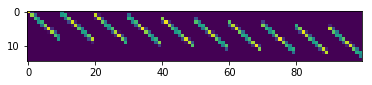

In [5]:
def construct_X(M, alphas, Np=None):
    if Np == None:
        Np = int(np.ceil(np.sqrt(2)*M))
        if Np % 2 == 0:
            Np += 1
        
    D = M*M
    N = Np*len(alphas)
    print(N, D)

    angles = np.array(alphas)/180*np.pi

    
    a0 = 0
    b0 = 0
    s0 = 0#np.array([0.78, 0.78, 0])[:,np.newaxis]
    
    
    gridX, gridY = np.meshgrid(np.arange(M), np.arange(M))
    
    C0 = a0 + gridX.flatten()
    C1 = b0 + gridY.flatten()
    C = np.stack([C0, C1], axis=0)
    
    n = np.array([np.cos(angles), np.sin(angles)]).T
    
    print(n.shape, C.shape)
    
    p = n.dot(C) + s0
    
    print(n)
    print(C)
    print(p)
    #print(np.floor(p[0]))
    #print(1-(p[0] - np.floor(p[0])))
    
    sensor1 = np.floor(p)
    sensor2 = sensor1 + 1
    weights1 = 1 - (p - np.floor(p))
    weights2 = 1 - weights1
    
    sensor = np.concatenate((sensor1, sensor2), axis=1)
    weights = np.concatenate((weights1, weights2), axis=1)

    
    print(sensor.shape)
    
    i_indices = np.zeros((len(angles), sensor.shape[1]))
    j_indices = np.zeros((len(angles), sensor.shape[1]))
    for i_o, (sensor_io, weights_io) in enumerate(zip(sensor, weights)):
        print(i_o, ":", sensor_io.shape, weights_io.shape)
        i_indices[i_o] = sensor_io + Np*i_o
        j_indices[i_o] = np.array([np.arange(D), np.arange(D)]).flatten()
        
    i_indices = i_indices.flatten()
    j_indices = j_indices.flatten()
    
    print(i_indices.shape, j_indices.shape, weights.shape)
    
    X = coo_matrix((weights.flatten(), (i_indices, j_indices)), shape=(N, D), dtype=np.float32)
    return X
    
    
X = construct_X(10, [33])
print(X.toarray())
print(X.toarray().shape)
plt.imshow(X.toarray())

[[0.22489321 0.         0.         ... 0.         0.         0.        ]
 [0.7751068  0.38622263 0.         ... 0.         0.         0.        ]
 [0.         0.61377734 0.54755205 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


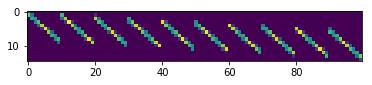

In [105]:
X_example = np.load('hs_tomography/X_example.npy')
print(X_example)
plt.imshow(X_example[:15])

In [13]:
print(np.meshgrid(np.arange(0,10), np.arange(0,10))[0].flatten())
print(np.meshgrid(np.arange(0,10), np.arange(0,10))[1])

[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6
 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3
 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
[[0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 3 3 3]
 [4 4 4 4 4 4 4 4 4 4]
 [5 5 5 5 5 5 5 5 5 5]
 [6 6 6 6 6 6 6 6 6 6]
 [7 7 7 7 7 7 7 7 7 7]
 [8 8 8 8 8 8 8 8 8 8]
 [9 9 9 9 9 9 9 9 9 9]]


In [72]:
angle = -33
theta = (angle/180.) * np.pi

rotMatrix = np.array([[np.cos(theta), -np.sin(theta)], 
                         [np.sin(theta),  np.cos(theta)]])

print(rotMatrix.dot(np.array([1,0])))
print(np.array([-np.sin(np.array([-33,0,90])/180*np.pi), np.cos(np.array([-33,0,90])/180*np.pi)]).T)

[ 0.83867057 -0.54463904]
[[ 5.44639035e-01  8.38670568e-01]
 [-0.00000000e+00  1.00000000e+00]
 [-1.00000000e+00  6.12323400e-17]]
